<a href="https://colab.research.google.com/github/Manan1811/FaceNet-Model/blob/main/FaceNet_Model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Oct 14 19:53:15 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki_crop.tar

--2020-10-14 19:53:42--  https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki_crop.tar
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.162
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 811315200 (774M) [application/x-tar]
Saving to: ‘wiki_crop.tar’

wiki_crop.tar       100%[===================>] 773.73M  24.5MB/s    in 32s     

2020-10-14 19:54:15 (24.0 MB/s) - ‘wiki_crop.tar’ saved [811315200/811315200]



In [4]:
!wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/imdb_crop.tar

--2020-10-14 19:54:15--  https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/imdb_crop.tar
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.162
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7012157440 (6.5G) [application/x-tar]
Saving to: ‘imdb_crop.tar’

imdb_crop.tar       100%[===================>]   6.53G  23.8MB/s    in 4m 40s  

2020-10-14 19:58:56 (23.9 MB/s) - ‘imdb_crop.tar’ saved [7012157440/7012157440]



In [5]:
!tar -xf wiki_crop.tar
!tar -xf imdb_crop.tar

In [6]:
import os

ages = os.scandir('wiki_crop')
length = 0
for age in ages:
  print(age.path)
  if '.mat' not in str(age.path):
    length+=len(os.listdir(age.path))
  
print(length)

wiki_crop/95
wiki_crop/27
wiki_crop/86
wiki_crop/90
wiki_crop/62
wiki_crop/05
wiki_crop/92
wiki_crop/97
wiki_crop/46
wiki_crop/66
wiki_crop/45
wiki_crop/78
wiki_crop/04
wiki_crop/76
wiki_crop/50
wiki_crop/09
wiki_crop/63
wiki_crop/77
wiki_crop/67
wiki_crop/42
wiki_crop/87
wiki_crop/35
wiki_crop/29
wiki_crop/75
wiki_crop/70
wiki_crop/65
wiki_crop/17
wiki_crop/12
wiki_crop/54
wiki_crop/19
wiki_crop/72
wiki_crop/11
wiki_crop/58
wiki_crop/98
wiki_crop/02
wiki_crop/38
wiki_crop/24
wiki_crop/15
wiki_crop/41
wiki_crop/13
wiki_crop/10
wiki_crop/00
wiki_crop/88
wiki_crop/52
wiki_crop/84
wiki_crop/68
wiki_crop/18
wiki_crop/47
wiki_crop/79
wiki_crop/59
wiki_crop/08
wiki_crop/81
wiki_crop/83
wiki_crop/21
wiki_crop/94
wiki_crop/57
wiki_crop/71
wiki_crop/wiki.mat
wiki_crop/16
wiki_crop/91
wiki_crop/80
wiki_crop/96
wiki_crop/61
wiki_crop/06
wiki_crop/25
wiki_crop/82
wiki_crop/56
wiki_crop/32
wiki_crop/44
wiki_crop/64
wiki_crop/99
wiki_crop/60
wiki_crop/40
wiki_crop/34
wiki_crop/23
wiki_crop/31
wiki_c

In [7]:
import os
ages = os.scandir('imdb_crop')
length = 0
for age in ages:
  print(age.path)
  if '.mat' not in str(age.path):
    length+=len(os.listdir(age.path))
  
print(length)

imdb_crop/95
imdb_crop/27
imdb_crop/86
imdb_crop/90
imdb_crop/62
imdb_crop/05
imdb_crop/92
imdb_crop/97
imdb_crop/46
imdb_crop/66
imdb_crop/45
imdb_crop/78
imdb_crop/04
imdb_crop/76
imdb_crop/50
imdb_crop/09
imdb_crop/63
imdb_crop/77
imdb_crop/67
imdb_crop/42
imdb_crop/87
imdb_crop/35
imdb_crop/29
imdb_crop/75
imdb_crop/70
imdb_crop/65
imdb_crop/17
imdb_crop/12
imdb_crop/54
imdb_crop/19
imdb_crop/72
imdb_crop/11
imdb_crop/58
imdb_crop/98
imdb_crop/02
imdb_crop/38
imdb_crop/24
imdb_crop/15
imdb_crop/41
imdb_crop/13
imdb_crop/10
imdb_crop/00
imdb_crop/88
imdb_crop/52
imdb_crop/84
imdb_crop/68
imdb_crop/18
imdb_crop/47
imdb_crop/79
imdb_crop/59
imdb_crop/08
imdb_crop/81
imdb_crop/83
imdb_crop/21
imdb_crop/94
imdb_crop/57
imdb_crop/71
imdb_crop/16
imdb_crop/91
imdb_crop/80
imdb_crop/96
imdb_crop/61
imdb_crop/06
imdb_crop/25
imdb_crop/82
imdb_crop/56
imdb_crop/32
imdb_crop/44
imdb_crop/64
imdb_crop/99
imdb_crop/60
imdb_crop/40
imdb_crop/34
imdb_crop/23
imdb_crop/31
imdb_crop/74
imdb_crop/39

In [8]:
import scipy.io
imdbMat = scipy.io.loadmat('imdb_crop/imdb.mat')
imdbPlace = imdbMat['imdb'][0][0]
imdbMat

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Jan 17 11:30:27 2016',
 '__version__': '1.0',
 'imdb': array([[(array([[693726, 693726, 693726, ..., 726831, 726831, 726831]], dtype=int32), array([[1968, 1970, 1968, ..., 2011, 2011, 2011]], dtype=uint16), array([[array(['01/nm0000001_rm124825600_1899-5-10_1968.jpg'], dtype='<U43'),
         array(['01/nm0000001_rm3343756032_1899-5-10_1970.jpg'], dtype='<U44'),
         array(['01/nm0000001_rm577153792_1899-5-10_1968.jpg'], dtype='<U43'),
         ...,
         array(['08/nm3994408_rm926592512_1989-12-29_2011.jpg'], dtype='<U44'),
         array(['08/nm3994408_rm943369728_1989-12-29_2011.jpg'], dtype='<U44'),
         array(['08/nm3994408_rm976924160_1989-12-29_2011.jpg'], dtype='<U44')]],
       dtype=object), array([[1., 1., 1., ..., 0., 0., 0.]]), array([[array(['Fred Astaire'], dtype='<U12'),
         array(['Fred Astaire'], dtype='<U12'),
         array(['Fred Astaire'], dtype='<U12'), ..

In [9]:
print(imdbPlace)
print(len(imdbPlace))

(array([[693726, 693726, 693726, ..., 726831, 726831, 726831]], dtype=int32), array([[1968, 1970, 1968, ..., 2011, 2011, 2011]], dtype=uint16), array([[array(['01/nm0000001_rm124825600_1899-5-10_1968.jpg'], dtype='<U43'),
        array(['01/nm0000001_rm3343756032_1899-5-10_1970.jpg'], dtype='<U44'),
        array(['01/nm0000001_rm577153792_1899-5-10_1968.jpg'], dtype='<U43'),
        ...,
        array(['08/nm3994408_rm926592512_1989-12-29_2011.jpg'], dtype='<U44'),
        array(['08/nm3994408_rm943369728_1989-12-29_2011.jpg'], dtype='<U44'),
        array(['08/nm3994408_rm976924160_1989-12-29_2011.jpg'], dtype='<U44')]],
      dtype=object), array([[1., 1., 1., ..., 0., 0., 0.]]), array([[array(['Fred Astaire'], dtype='<U12'),
        array(['Fred Astaire'], dtype='<U12'),
        array(['Fred Astaire'], dtype='<U12'), ...,
        array(['Jane Levy'], dtype='<U9'),
        array(['Jane Levy'], dtype='<U9'),
        array(['Jane Levy'], dtype='<U9')]], dtype=object), array([[array([[

In [10]:
for item in imdbPlace:
  print(item)
  print(len(item[0]))

[[693726 693726 693726 ... 726831 726831 726831]]
460723
[[1968 1970 1968 ... 2011 2011 2011]]
460723
[[array(['01/nm0000001_rm124825600_1899-5-10_1968.jpg'], dtype='<U43')
  array(['01/nm0000001_rm3343756032_1899-5-10_1970.jpg'], dtype='<U44')
  array(['01/nm0000001_rm577153792_1899-5-10_1968.jpg'], dtype='<U43')
  ...
  array(['08/nm3994408_rm926592512_1989-12-29_2011.jpg'], dtype='<U44')
  array(['08/nm3994408_rm943369728_1989-12-29_2011.jpg'], dtype='<U44')
  array(['08/nm3994408_rm976924160_1989-12-29_2011.jpg'], dtype='<U44')]]
460723
[[1. 1. 1. ... 0. 0. 0.]]
460723
[[array(['Fred Astaire'], dtype='<U12')
  array(['Fred Astaire'], dtype='<U12')
  array(['Fred Astaire'], dtype='<U12') ...
  array(['Jane Levy'], dtype='<U9') array(['Jane Levy'], dtype='<U9')
  array(['Jane Levy'], dtype='<U9')]]
460723
[[array([[1072.926,  161.838, 1214.784,  303.696]])
  array([[477.184, 100.352, 622.592, 245.76 ]])
  array([[114.96964309, 114.96964309, 451.68657236, 451.68657236]]) ...
  array([

In [11]:
wikiMat = scipy.io.loadmat('wiki_crop/wiki.mat')
wikiPlace = wikiMat['wiki'][0][0]
print(wikiPlace)
print(len(wikiPlace))
for item in wikiPlace:
  print(item)
  print(len(item[0]))

(array([[723671, 703186, 711677, ..., 720620, 723893, 713846]], dtype=int32), array([[2009, 1964, 2008, ..., 2013, 2011, 2008]], dtype=uint16), array([[array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31'),
        array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31'),
        array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29'), ...,
        array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30'),
        array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30'),
        array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')]],
      dtype=object), array([[1., 1., 1., ..., 1., 1., 0.]]), array([[array(['Sami Jauhojärvi'], dtype='<U15'),
        array(['Dettmar Cramer'], dtype='<U14'),
        array(['Marc Okrand'], dtype='<U11'), ...,
        array(['Michael Wiesinger'], dtype='<U17'),
        array(['Johann Grugger'], dtype='<U14'),
        array(['Greta Van Susteren'], dtype='<U18')]], dtype=object), array([[array([[111.29109473, 111.29109473, 252.66993082, 252.66993082]]),
  

In [12]:
place = imdbPlace
where='imdb_crop'
img_loc=[]
corr_ages=[]
total = 0



for i in range(460723):
  #print(place[0][0][i])
  bYear = int(place[0][0][i]/365) #birth year
  #print(bYear)
  taken = place[1][0][i] #photo taken
  #print(taken)
  path = place[2][0][i][0]
  age = taken - bYear
  img_loc.append(os.path.join(where,path))
  corr_ages.append(age)
  """print("AGE", age)
  print('----------------------')
  
  
  faceScore = str(faceScore)
  secFaceScore = str(secFaceScore)
  
  
  
  
  if 'n' not in faceScore: # n as in Inf; if true, implies that there isn't a face in the image
    
    if 'a' in secFaceScore: #a as in NaN; implies that no second face was found
      
      if age >= 0: 
      
        try:
          gender = int(gender)
          total +=1
          
          if i > 1500:
            
            print('----------------------')
            print(i)
            print(bYear)
            print(taken)
            print("AGE", age)
            print("NAME", name)
            print("GENDER", gender)
            print(faceBox)
            print(faceScore)
            print(secFaceScore)
            
            imShow(os.path.join(where,path))
            break
               
        except:
          print('Failed with gender')
          continue"""

#print(total)

In [13]:
print(img_loc[:10])
print(corr_ages[:10])

['imdb_crop/01/nm0000001_rm124825600_1899-5-10_1968.jpg', 'imdb_crop/01/nm0000001_rm3343756032_1899-5-10_1970.jpg', 'imdb_crop/01/nm0000001_rm577153792_1899-5-10_1968.jpg', 'imdb_crop/01/nm0000001_rm946909184_1899-5-10_1968.jpg', 'imdb_crop/01/nm0000001_rm980463616_1899-5-10_1968.jpg', 'imdb_crop/02/nm0000002_rm1075631616_1924-9-16_1991.jpg', 'imdb_crop/02/nm0000002_rm1346607872_1924-9-16_2004.jpg', 'imdb_crop/02/nm0000002_rm1363385088_1924-9-16_2004.jpg', 'imdb_crop/02/nm0000002_rm1411175936_1924-9-16_1991.jpg', 'imdb_crop/02/nm0000002_rm1447271168_1924-9-16_2004.jpg']
[68, 70, 68, 68, 68, 66, 79, 79, 66, 79]


In [63]:
import pandas as pd
df = pd.DataFrame(img_loc,columns=['Image Location'])
df

,Image Location
0,imdb_crop/01/nm0000001_rm124825600_1899-5-10_1...
1,imdb_crop/01/nm0000001_rm3343756032_1899-5-10_...
2,imdb_crop/01/nm0000001_rm577153792_1899-5-10_1...
3,imdb_crop/01/nm0000001_rm946909184_1899-5-10_1...
4,imdb_crop/01/nm0000001_rm980463616_1899-5-10_1...
...,...
460718,imdb_crop/08/nm3994408_rm761245696_1989-12-29_...
460719,imdb_crop/08/nm3994408_rm784182528_1989-12-29_...
460720,imdb_crop/08/nm3994408_rm926592512_1989-12-29_...
460721,imdb_crop/08/nm3994408_rm943369728_1989-12-29_...


In [64]:
df['Age']=corr_ages
df

,Image Location,Age
0,imdb_crop/01/nm0000001_rm124825600_1899-5-10_1...,68
1,imdb_crop/01/nm0000001_rm3343756032_1899-5-10_...,70
2,imdb_crop/01/nm0000001_rm577153792_1899-5-10_1...,68
3,imdb_crop/01/nm0000001_rm946909184_1899-5-10_1...,68
4,imdb_crop/01/nm0000001_rm980463616_1899-5-10_1...,68
...,...,...
460718,imdb_crop/08/nm3994408_rm761245696_1989-12-29_...,20
460719,imdb_crop/08/nm3994408_rm784182528_1989-12-29_...,20
460720,imdb_crop/08/nm3994408_rm926592512_1989-12-29_...,20
460721,imdb_crop/08/nm3994408_rm943369728_1989-12-29_...,20


In [65]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))


In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
image=cv2.imread(df['Image Location'][10])
new_image=cv2.resize(image,(224,224),interpolation = cv2.INTER_CUBIC)
print(new_image.shape)

(224, 224, 3)


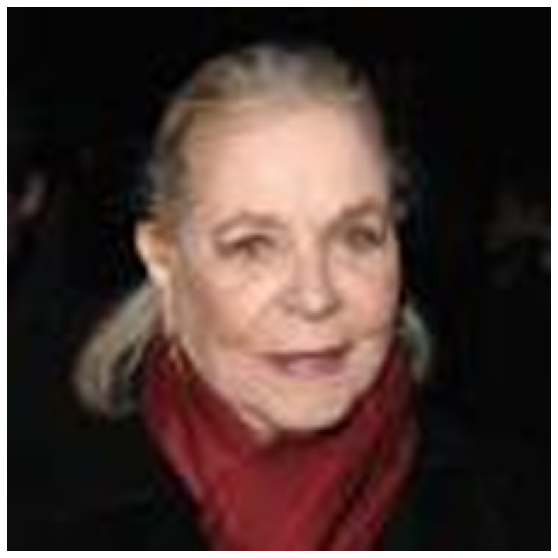

In [67]:
fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
#plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [84]:
from PIL import Image
import numpy as np
import random
def get_images(batch_size, img_size=(160,160),add=df['Image Location'], age=df['Age']):
  rand=random.sample(range(10, len(add)), batch_size)
  X=[]
  y=[]
  for i in rand:
    image=cv2.imread(add[i])
    curr_img=cv2.resize(image,img_size,interpolation = cv2.INTER_CUBIC)
    curr_img=curr_img.astype('float64')
    curr_img=curr_img/127.5
    curr_img=curr_img-1
    curr_age=age[i]
    X.append(curr_img)
    y.append(curr_age)
  
  return X,y

In [21]:
!pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-onj21v52
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-onj21v52
  Created wheel for keras-vggface: filename=keras_vggface-0.6-cp36-none-any.whl size=8311 sha256=392a4b71954fc18c313fbbdfae12f169926a5786f5ecaa18b34f28dcdfde2248
  Stored in directory: /tmp/pip-ephem-wheel-cache-v3gmckq5/wheels/36/07/46/06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface


In [22]:
! pip show keras-vggface

Name: keras-vggface
Version: 0.6
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcmalli/keras-vggface
Author: Refik Can MALLI
Author-email: mallir@itu.edu.tr
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: six, keras, h5py, numpy, pillow, pyyaml, scipy
Required-by: 


In [23]:
! pip install mtcnn

     |████████████████████████████████| 2.3MB 3.4MB/s 


In [24]:
! git clone https://github.com/arshagarwal/outlier-experiment.git -b slim_dataset_creation

Cloning into 'outlier-experiment'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 11749 (delta 6), reused 8 (delta 2), pack-reused 11736
Receiving objects: 100% (11749/11749), 147.41 MiB | 36.24 MiB/s, done.
Resolving deltas: 100% (135/135), done.


In [37]:
cd './outlier-experiment'

/content/outlier-experiment


In [38]:
! bash import_weights.sh

will be placed in the single file you specified.

--2020-10-14 20:26:01--  https://docs.google.com/uc?export=download&id=1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1
Resolving docs.google.com (docs.google.com)... 108.177.111.138, 108.177.111.101, 108.177.111.102, ...
Connecting to docs.google.com (docs.google.com)|108.177.111.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-4s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/18vv1ivnqnk73hudjbbjgbv8cfqqfb1t/1602707100000/09379222848295305915/*/1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1?e=download [following]
--2020-10-14 20:26:04--  https://doc-04-4s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/18vv1ivnqnk73hudjbbjgbv8cfqqfb1t/1602707100000/09379222848295305915/*/1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1?e=download
Resolving doc-04-4s-docs.googleusercontent.com (doc-04-4s-docs.googleusercontent.com)... 173.194.198.132, 2607:f8b0:4001:c1c::84
Connecti

In [52]:
from tensorflow.keras.models import load_model
prev_model=load_model('Facenet/facenet_model.h5')
prev_model_weights=model.load_weights('Facenet/facenet_weights.h5')
prev_model.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
________________________________________________________________________________

In [53]:
# Regression Model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
model=Sequential()
model.add(prev_model)
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v1 (Functio (None, 128)               22808144  
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
batch_normalization_2 (Batch (None, 16)                6

In [83]:
from PIL import Image
import numpy as np
import random
import cv2
image=cv2.imread(df['Image Location'][10])
curr_img=cv2.resize(image,(160,160),interpolation = cv2.INTER_CUBIC)
curr_img=curr_img.astype('float64')
curr_img=curr_img/127.5
curr_img=curr_img-1
print(curr_img.shape)

(160, 160, 3)


In [86]:
epochs=5
batch_size=5
for i in range(epochs):
  X,y=get_images(batch_size)
  X=np.array(X)
  y=np.array(y)
  print(X.shape,y.shape)


(5, 160, 160, 3) (5,)
(5, 160, 160, 3) (5,)
(5, 160, 160, 3) (5,)
(5, 160, 160, 3) (5,)
(5, 160, 160, 3) (5,)


In [ ]:
epochs=20
batch_size=10
for i in range(epochs):
  X,y=get_images(batch_size)
  X=np.array(X)
  y=np.array(y)
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
